#### Amghar Rylan

# Le réchauffement climatique

## Introduction : 
### Dans ce mini-projet, nous allons essayer de déterminer si les différentes mesures de températures révèlent un véritable réchauffement climatique ou simplement de légères fluctuations saisonnières. Pour cela, nous ajusterons notre modèle aux données de la station météorologique.

# Partie 1 : Modéliser un effet faible et lent 

### On commence par importer nos modules :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Ensuite, on récupère nos données et on convertit les dates en années :

In [2]:
dates_julian, températures = np.loadtxt("montelimar_temperature.dat", unpack = True)
dates_années = dates_julian / 365.25 + 1859

### On dessine notre graphe :

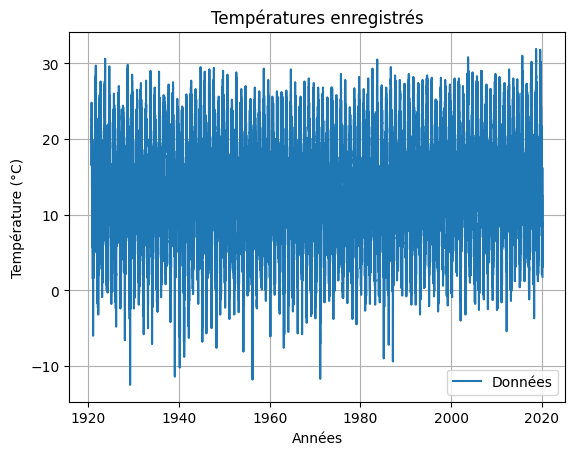

In [3]:
plt.plot(dates_années, températures, label="Données")
plt.xlabel("Années")
plt.ylabel("Température (°C)")
plt.title("Températures enregistrés")
plt.legend()
plt.grid()
plt.show()

# Partie 2 :

## Modèle sinusoïdal :

### On définit notre fonction pour ajuster notre modèle :

In [4]:
def ajustement(t, A, omega, phi, B) :
    return A*np.sin(omega*t + phi) + B 

param, cov = curve_fit(ajustement, dates_années, températures, p0 = [1, 2*np.pi, 0, np.mean(températures)])

A, omega, phi, B = param

### On réalise un filtre à l'aide d'une boucle for :

In [5]:
B_ajusté = [] 

for i in range(10) :
    start = 1920 + i*10
    end = 1920 +(i+1)*10
    filtre = (dates_années >= start) & (dates_années < end)
    dates_années_d = dates_années[filtre]
    températures_d = températures[filtre]
    param, cov = curve_fit(ajustement, dates_années_d, températures_d, p0 = [1, 2*np.pi, 0, np.mean(températures_d)])
    A, omega, phi, B = param[0], param[1], param[2], param[3]
    B_ajusté.append(B)

### On dessine notre graphe : 

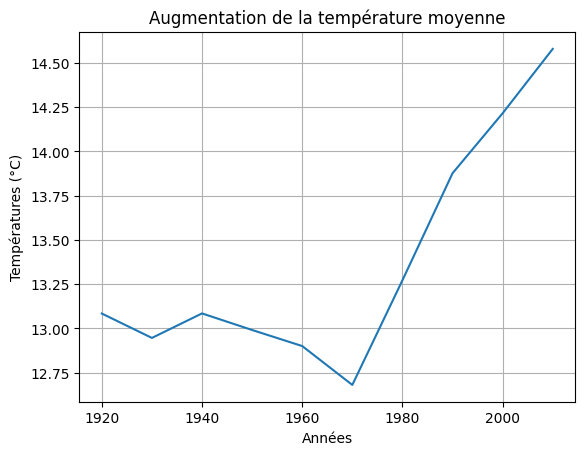

In [6]:
plt.plot(np.arange(1920, 2020, 10), B_ajusté)
plt.xlabel("Années")
plt.ylabel("Températures (°C)")
plt.title("Augmentation de la température moyenne")
plt.grid()
plt.show()

### On observe une augmentation d'environ 1.5°C entre 1920 et 2020 ce qui signifie qu'il y a un réchauffement significatif.

## Modèle sinusoïdal linéaire :

### On définit notre nouvelle fonction pour ajuster notre nouveau modèle : 

In [7]:
def ajustement_linéaire(t, A, omega, phi, B, C) :
    return A * np.sin(omega * t + phi) + B + C * t

param, cov = curve_fit(ajustement_linéaire, dates_années, températures, p0=[1, 2*np.pi, 0, np.mean(températures), 0])

A, omega, phi, B, C = param

Ajuste = ajustement_linéaire(dates_années, A, omega, phi, B, C)

### On dessine notre graphe 

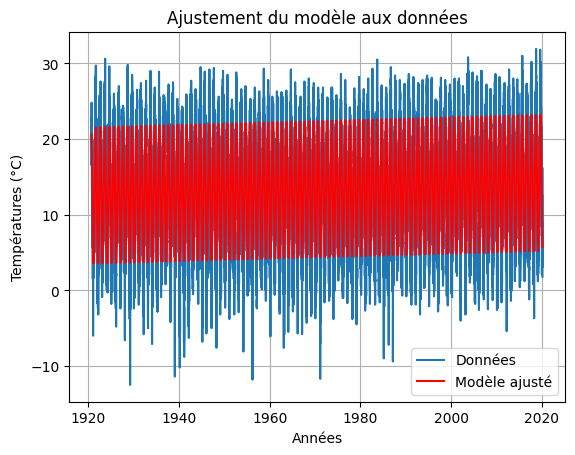

In [8]:
plt.plot(dates_années, températures, label="Données")
plt.plot(dates_années, Ajuste, label='Modèle ajusté', color='r')
plt.xlabel('Années')
plt.ylabel('Températures (°C)')
plt.title('Ajustement du modèle aux données')
plt.legend()
plt.grid()
plt.show()

On observe dans notre graphe que le modèle représente un réchauffement significatif de plus d'un degré.

## Conclusion :
### Nous avons donc pu faire apparaître un effet faible et lent à l'échelle des données.                                      De plus, grâce à l'ajustement de nos différents modèles, nous avons pu montrer qu'il y avait bien une augmentation significative des températures .